In [2]:
import seaborn as sb
import numpy as np
import pandas as pd
from scipy import stats
from numpy.random import default_rng
from numpy.random import SeedSequence



In [3]:
data = pd.read_excel("metal_tests.xlsx", na_values = "ND")
data.info()
data.to_csv("data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  1274 non-null   object 
 1   accessioning_type    1275 non-null   object 
 2   sample_id            1275 non-null   object 
 3   arsenic_ug_g         885 non-null    float64
 4   cadmium_ug_g         1072 non-null   float64
 5   lead_ug_g            1097 non-null   float64
 6   mercury_ug_g         961 non-null    float64
dtypes: float64(4), object(3)
memory usage: 69.9+ KB


In [4]:
data.lead_ug_g.value_counts()

0.107667    4
0.028733    3
0.123333    3
0.021567    3
0.121333    3
           ..
0.001767    1
0.147000    1
0.019967    1
1.403333    1
0.036667    1
Name: lead_ug_g, Length: 945, dtype: int64

In [5]:
flower = data.loc[(data.accessioning_type == "Flower") | (data.accessioning_type == "Leaf/Mixed Plant Material"),:].copy()

In [6]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


In [7]:
floc = flower.replace("ND", np.nan)

In [8]:
floc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


In [9]:
rng = default_rng(SeedSequence().entropy)
dist_pb = np.abs(stats.norm.rvs(loc = 0, scale = 0.042/2, size = 10000, random_state = rng))
rng = default_rng(SeedSequence().entropy+10)
dist_hg = np.abs(stats.norm.rvs(loc = 0, scale = 0.016/2, size = 10000, random_state = rng))
rng = default_rng(SeedSequence().entropy+ 20)
dist_cd = np.abs(stats.norm.rvs(loc = 0, scale = 0.016/2, size = 10000, random_state = rng))
rng = default_rng(SeedSequence().entropy +30)
dist_as = np.abs(stats.norm.rvs(loc = 0, scale = 0.042/2, size = 10000, random_state = rng))




In [10]:
flocc = floc.copy()
flocc.lead_ug_g = flocc.lead_ug_g.fillna(pd.Series(dist_pb))
flocc.mercury_ug_g = flocc.mercury_ug_g.fillna(pd.Series(dist_hg))
flocc.cadmium_ug_g = flocc.cadmium_ug_g.fillna(pd.Series(dist_cd))
flocc.arsenic_ug_g = flocc.arsenic_ug_g.fillna(pd.Series(dist_as))
flocc.info()
floc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         453 non-null    float64
 4   cadmium_ug_g         453 non-null    float64
 5   lead_ug_g            453 non-null    float64
 6   mercury_ug_g         453 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-nul

<AxesSubplot:xlabel='lead_ug_g', ylabel='Count'>

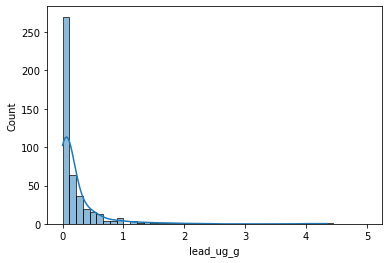

In [11]:
sb.histplot(data=flocc, x = "lead_ug_g", bins= 45, binrange = (0,5), kde=True)

<AxesSubplot:xlabel='mercury_ug_g', ylabel='Count'>

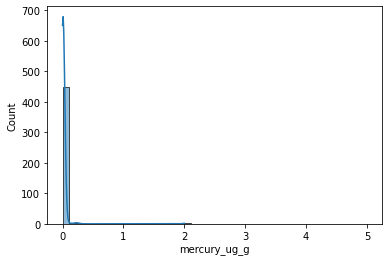

In [17]:
sb.histplot(data=flocc, x = "mercury_ug_g", kde=True, bins= 45, binrange = (0,5))

<AxesSubplot:xlabel='arsenic_ug_g', ylabel='Count'>

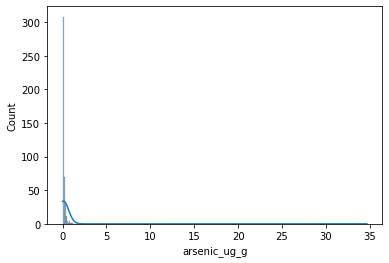

In [18]:
sb.histplot(data=flocc, x = "arsenic_ug_g", bins= 45, binrange = (0,5), kde=True)

<AxesSubplot:xlabel='cadmium_ug_g', ylabel='Count'>

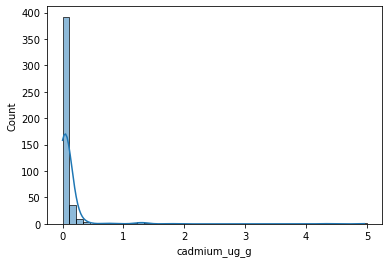

In [19]:
sb.histplot(data=flocc, x = "cadmium_ug_g", bins= 45, binrange = (0,5), kde=True)

In [20]:
flocc.describe()

,arsenic_ug_g,cadmium_ug_g,lead_ug_g,mercury_ug_g
count,453.000000,453.000000,453.000000,453.000000
mean,0.262642,0.099709,0.219588,0.015474
std,1.891038,0.353996,0.419811,0.095822
min,-0.005500,0.000067,0.000667,0.000033
25%,0.029700,0.018267,0.022867,0.003600
50%,0.063300,0.035300,0.075367,0.007333
75%,0.144000,0.070367,0.234333,0.012900
max,34.666667,4.956667,4.346667,2.000000


In [13]:
from fitter import Fitter
# DIST_CONTINU = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
# print(len(DIST_CONTINU))

In [22]:
# f = Fitter(flocc.lead_ug_g.to_numpy(), distributions=DIST_CONTINU)
# f.fit()
# f.summary()

In [23]:
# f.summary()

In [24]:
# f_hg = Fitter(np.sort(flocc.mercury_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_hg.fit()
# f_hg.summary()

In [25]:
# f_pb = Fitter(np.sort(flocc.lead_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_pb.fit()
# f_pb.summary()

In [26]:
# f_as = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_as.fit()
# f_as.summary()

In [27]:
# f_cd = Fitter(flocc.cadmium_ug_g.to_numpy()[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_cd.fit()
# f_cd.summary()

In [28]:
# f_cd = Fitter(np.sort(flocc.cadmium_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
# f_cd.fit()
# f_cd.summary()

In [29]:
f_as = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_as.fit()
f_hg = Fitter(np.sort(flocc.mercury_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_hg.fit()
f_cd = Fitter(np.sort(flocc.cadmium_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_cd.fit()
f_pb = Fitter(np.sort(flocc.lead_ug_g.to_numpy())[5:-5], distributions=["chi2", "geninvgauss", "powerlognorm", "johnsonsu"])
f_pb.fit()

,sumsquare_error,aic,bic,kl_div
powerlognorm,35.641954,318.281124,-1092.006251,inf
johnsonsu,36.255812,312.348325,-1084.441459,inf
geninvgauss,39.941505,308.911956,-1041.551836,inf
chi2,81.986709,307.774293,-729.065883,inf


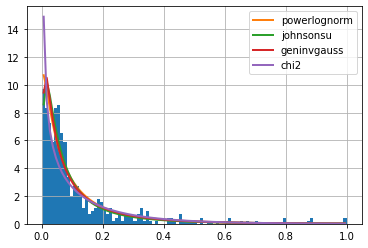

In [30]:
f_as.summary()


,sumsquare_error,aic,bic,kl_div
geninvgauss,13.063261,638.840564,-1536.654038,inf
powerlognorm,20.256266,686.784126,-1342.327490,inf
johnsonsu,22.219130,702.357805,-1301.354667,inf
chi2,176.205400,396.986569,-390.129588,inf


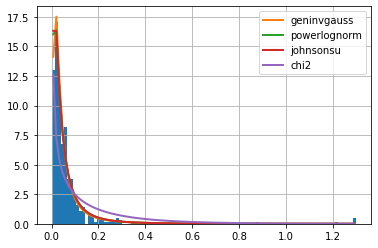

In [31]:
f_cd.summary()


,sumsquare_error,aic,bic,kl_div
geninvgauss,3.959727,438.132089,-2065.431587,inf
johnsonsu,6.566090,450.883680,-1841.387251,inf
powerlognorm,6.701052,451.761932,-1832.373929,inf
chi2,24.686236,489.123438,-1260.803799,inf


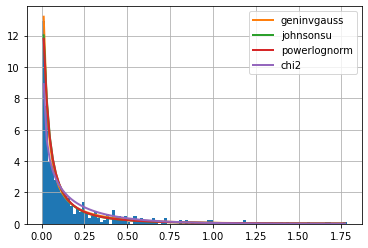

In [32]:
f_pb.summary()

,sumsquare_error,aic,bic,kl_div
geninvgauss,7675.768689,-129.553498,1287.922780,inf
powerlognorm,9652.773709,-126.138208,1389.448130,inf
johnsonsu,10548.213001,-186.646872,1428.747172,inf
chi2,62737.188760,-262.892956,2212.521686,inf


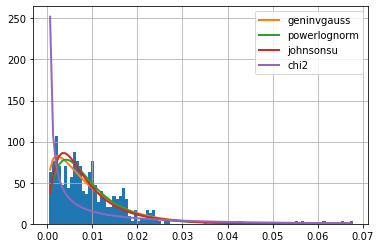

In [33]:
f_hg.summary()


In [34]:
f_pb.fitted_param['powerlognorm']

(1.5613542818737076,
 1.7549012846326968,
 0.0033702745947093438,
 0.13125820125977772)

In [35]:
f_hg.fitted_param['powerlognorm']

(0.010875003634891911,
 0.05886205584209317,
 -0.00840933107606875,
 0.008299278900606201)

In [36]:
f_cd.fitted_param['powerlognorm']

(0.1018642159064071,
 0.40968795368137567,
 -0.0035421300209334252,
 0.011263296817569594)

In [37]:
f_as.fitted_param['powerlognorm']

(29.38935615728034,
 2.6824296890262103,
 0.000684835484566508,
 13.790797560724862)

<AxesSubplot:>

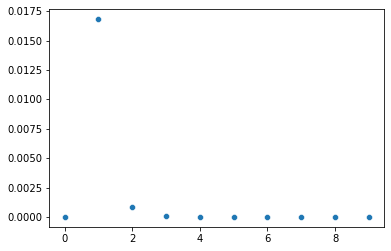

In [38]:
dist = stats.powerlognorm
as_p = f_as.fitted_param['powerlognorm']
X = np.arange(0,10, 1)
pdf_fitted = dist.pdf(X, *as_p)
sb.scatterplot(x=X, y=pdf_fitted)

In [39]:
f_as.fitted_pdf['powerlognorm']

array([10.70137272,  9.75009662,  8.35891169,  7.17115553,  6.19407812,
        5.3890161 ,  4.72006884,  4.15900655,  3.68425186,  3.27929179,
        2.93136936,  2.6305151 ,  2.36884722,  2.14006582,  1.93908428,
        1.76175744,  1.60467872,  1.46502689,  1.34044895,  1.22896974,
        1.12892138,  1.03888768,  0.95766012,  0.88420247,  0.81762237,
        0.75714816,  0.70211005,  0.65192454,  0.60608161,  0.56413405,
        0.52568852,  0.49039811,  0.45795602,  0.42809023,  0.400559  ,
        0.37514695,  0.35166181,  0.32993157,  0.30980203,  0.29113467,
        0.27380488,  0.25770031,  0.24271954,  0.22877083,  0.21577109,
        0.20364493,  0.19232386,  0.1817456 ,  0.17185339,  0.16259544,
        0.15392449,  0.1457973 ,  0.13817427,  0.13101914,  0.12429862,
        0.11798212,  0.11204154,  0.106451  ,  0.10118665,  0.09622652,
        0.0915503 ,  0.08713924,  0.08297602,  0.07904459,  0.07533007,
        0.07181871,  0.06849771,  0.06535521,  0.0623802 ,  0.05

In [40]:
from fitter import Fitter, get_common_distributions, get_distributions

In [41]:
f_as_c = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=get_common_distributions())
f_as_c.fit()

,sumsquare_error,aic,bic,kl_div
lognorm,36.239639,310.071313,-1090.732686,inf
gamma,44.860798,350.513903,-996.191707,inf
expon,46.382729,403.498036,-987.505534,inf
exponpow,74.151160,344.127946,-773.565868,inf
cauchy,77.698531,452.826587,-758.957767,inf


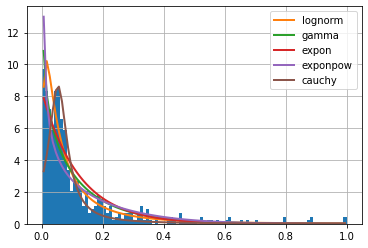

In [42]:
f_as_c.summary()

In [43]:
f_as_all = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5])
f_as_all.fit()

C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\si

C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested 

,sumsquare_error,aic,bic,kl_div
loglaplace,16.375838,317.724922,-1442.628207,inf
foldcauchy,22.622971,311.096558,-1299.468841,inf
kappa3,26.710962,326.989091,-1225.882891,inf
halfcauchy,30.763887,285.326977,-1169.394978,inf
skewcauchy,30.773297,287.357369,-1163.165933,inf


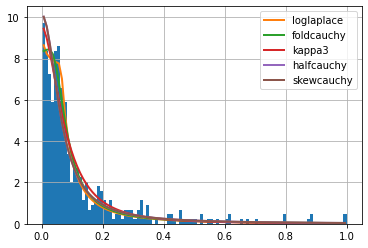

In [44]:
f_as_all.summary()

In [15]:
doi = ["loglaplace", "mielke", "kappa3", "burr", "burr12", "lognorm", "gamma", "expon", "cauchy", "exponpow"]

In [46]:
fa = Fitter(np.sort(flocc.arsenic_ug_g.to_numpy())[5:-5], distributions=doi)
fa.fit()
fc = Fitter(np.sort(flocc.cadmium_ug_g.to_numpy())[5:-5], distributions=doi)
fc.fit()
fl = Fitter(np.sort(flocc.lead_ug_g.to_numpy())[5:-5], distributions=doi)
fl.fit()
fm = Fitter(np.sort(flocc.mercury_ug_g.to_numpy())[5:-5], distributions=doi)
fm.fit()

C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested 

,sumsquare_error,aic,bic,kl_div
loglaplace,16.375838,317.724922,-1442.628207,inf
kappa3,26.710962,326.989091,-1225.882891,inf
burr,31.356843,338.525218,-1148.750516,inf
burr12,33.142674,323.255329,-1124.213114,inf
mielke,35.513828,405.920035,-1093.601616,inf


C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


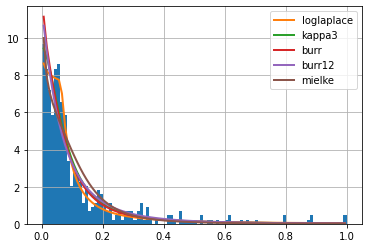

In [47]:
fa.summary()


,sumsquare_error,aic,bic,kl_div
burr12,13.328276,643.406999,-1527.756851,inf
burr,13.349908,644.628664,-1527.038423,inf
mielke,13.351907,644.670263,-1526.972088,inf
lognorm,24.432379,721.415679,-1265.382902,inf
kappa3,28.248315,695.204939,-1201.092725,inf


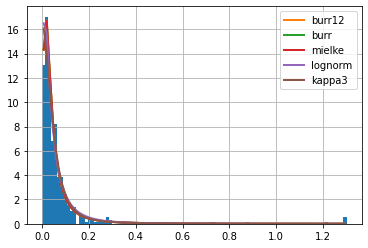

In [48]:
fc.summary()


,sumsquare_error,aic,bic,kl_div
lognorm,6.619427,448.866038,-1843.896790,inf
burr,8.906479,476.728045,-1706.334035,inf
kappa3,12.025638,457.068256,-1579.411596,inf
burr12,12.402924,465.214336,-1559.633144,inf
mielke,12.597003,470.722895,-1552.754824,inf


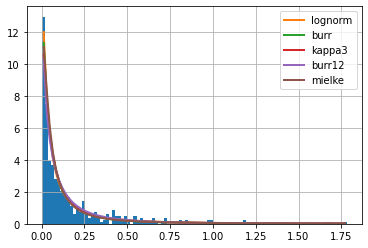

In [49]:
fl.summary()


,sumsquare_error,aic,bic,kl_div
kappa3,7763.650283,-39.673641,1286.872401,inf
lognorm,10510.902844,-189.815313,1421.083886,inf
expon,10573.514526,-195.263091,1417.621364,inf
burr12,10681.053780,-230.747372,1434.291333,inf
exponpow,12760.364919,-46.257741,1506.995227,inf


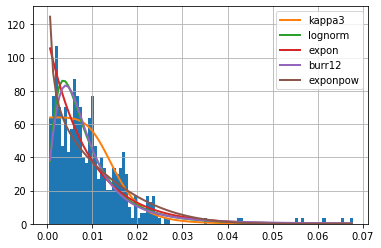

In [50]:
fm.summary()

In [51]:
pa = fa.fitted_param["lognorm"]
pc = fc.fitted_param["lognorm"]
pl = fl.fitted_param["lognorm"]
pm = fm.fitted_param["lognorm"]

In [52]:
pa

(1.173440571212828, -0.0022344097721718513, 0.06605005126276764)

In [53]:
pc

(1.0662489811418936, -0.0002100047231401417, 0.036796757185247816)

In [54]:
pm

(0.7281781027191212, -0.0012983834582655763, 0.008276916607336739)

In [55]:
pl

(1.535698810300702, 0.0032215040886630093, 0.06840980181898015)

In [56]:
test_dist = stats.lognorm.rvs(*pl, size = 1000, random_state=42)

<AxesSubplot:ylabel='Count'>

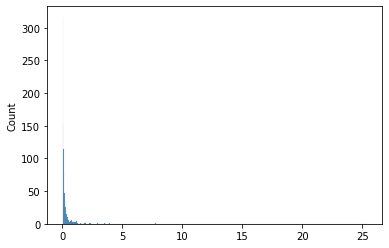

In [57]:
sb.histplot(test_dist)

<AxesSubplot:ylabel='Count'>

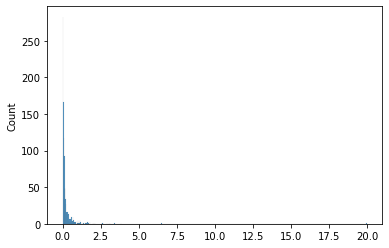

In [58]:
test2_dist = stats.lognorm.rvs(1.4525204178329565, 0.0001955834220820136, 0.07417152849481998, size = 1000, random_state=42)
sb.histplot(test2_dist)

<AxesSubplot:xlabel='lead_ug_g', ylabel='Count'>

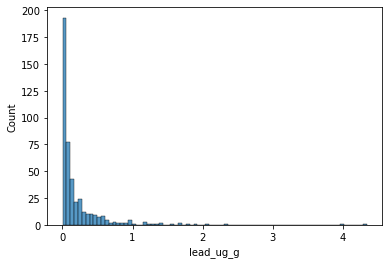

In [59]:
sb.histplot(data=flocc, x = "lead_ug_g")

<AxesSubplot:xlabel='lead_ug_g', ylabel='Density'>

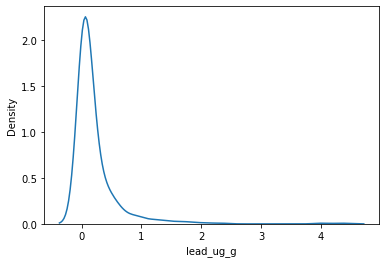

In [60]:
# sb.kdeplot(x=test2_dist)
sb.kdeplot(x=flocc.loc[:,"lead_ug_g"])

In [61]:
test_dist_s = np.sort(test_dist)
for i in test_dist_s[990:]:
    print(i)

2.929405671203616
2.972628715033881
3.0090667806001634
3.3179242723484648
3.4910509815717363
3.562886453686224
3.9006105052772253
4.46309940765431
7.740069983095345
25.39425255494967


In [62]:
fail = test_dist_s >= 1.24
1 - (np.sum(fail) / 1000)

0.972

In [63]:
floc.describe()

,arsenic_ug_g,cadmium_ug_g,lead_ug_g,mercury_ug_g
count,396.000000,442.000000,411.000000,352.000000
mean,0.297943,0.102014,0.240119,0.018087
std,2.020421,0.358076,0.435570,0.108569
min,-0.005500,0.000067,0.000667,0.000033
25%,0.042700,0.018975,0.030517,0.003950
50%,0.074433,0.036650,0.092267,0.008000
75%,0.175167,0.073267,0.250167,0.014783
max,34.666667,4.956667,4.346667,2.000000


<AxesSubplot:>

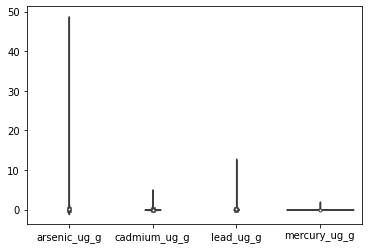

In [65]:
sb.violinplot(data=data)

C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

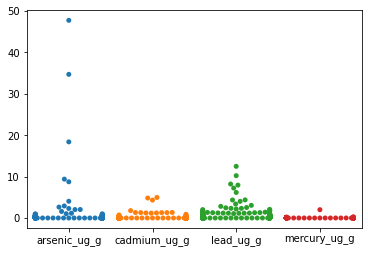

In [66]:
sb.swarmplot(data=data)

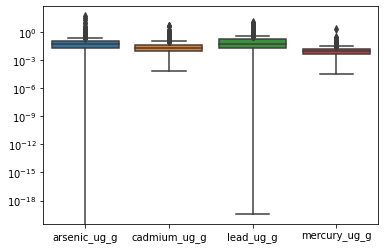

In [70]:
g = sb.boxplot(data=data)
g.set_yscale("log")

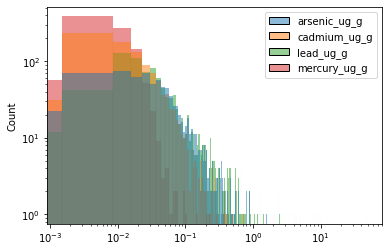

In [76]:
g = sb.histplot(data=data)
g.set_xscale("log")
g.set_yscale("log")

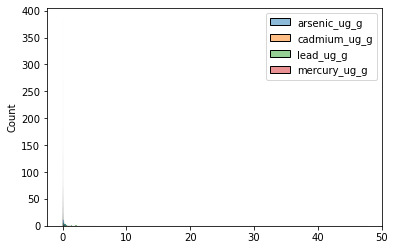

In [73]:
g = sb.histplot(data=data)

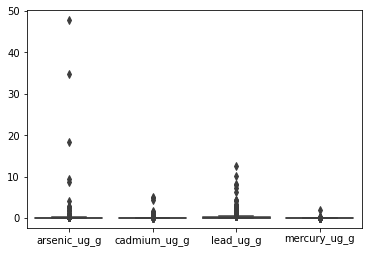

In [74]:
g = sb.boxplot(data=data)

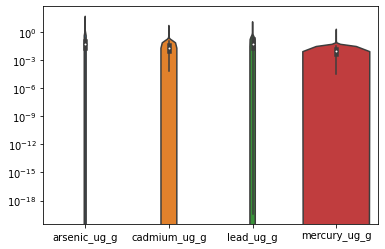

In [75]:
g = sb.violinplot(data=data)
g.set_yscale("log")

C:\Users\Tom\.conda\envs\Organigram\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


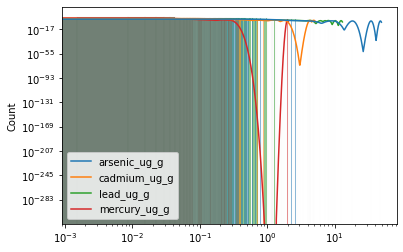

In [77]:
g = sb.histplot(data=data)
sb.kdeplot(data=data)
g.set_xscale("log")
g.set_yscale("log")

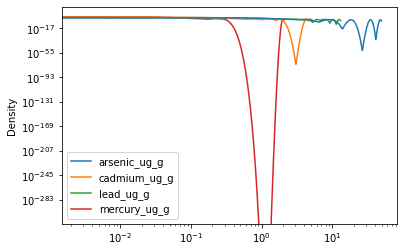

In [79]:
g= sb.kdeplot(data=data)
g.set_xscale("log")
g.set_yscale("log")

,sumsquare_error,aic,bic,kl_div
loglaplace,0.545933,874.405557,-6436.725573,inf
kappa3,0.909446,1024.618456,-5990.177656,inf
burr12,1.370688,1048.360203,-5624.450609,inf
mielke,1.754921,934.923531,-5408.228304,inf
lognorm,2.786638,1079.906212,-5010.391927,inf


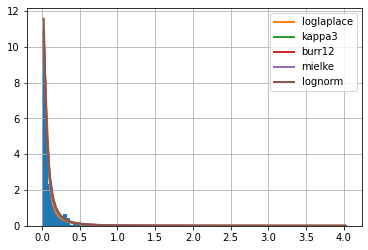

In [16]:
fa2 = Fitter(np.sort(data.arsenic_ug_g.dropna().values)[5:-5], distributions = doi)
fa2.fit()
fa2.summary()

(0.0, 1.0)

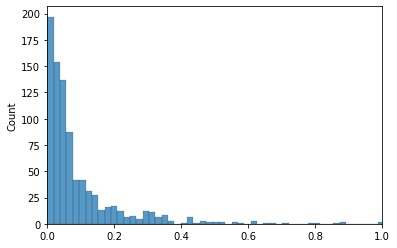

In [17]:
g = sb.histplot(x = np.sort(data.arsenic_ug_g.dropna().values)[5:-5])
g.set_xlim([0,1])

In [18]:
sim = np.sort(data.arsenic_ug_g.dropna().values)[5:-5]

<AxesSubplot:ylabel='Density'>

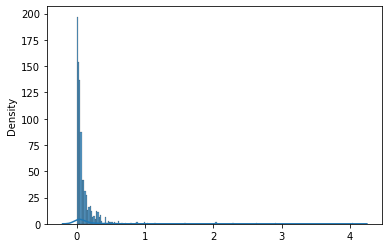

In [24]:
sb.kdeplot(x= sim)
sb.histplot(x=sim)
# plt.set_xlim([0,1])

In [31]:

fa3 = Fitter(sim, distributions= doi)
dir(fa3)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aic',
 '_alldata',
 '_bic',
 '_data',
 '_density',
 '_fitted_errors',
 '_get_xmax',
 '_get_xmin',
 '_init',
 '_kldiv',
 '_load_all_distributions',
 '_set_xmax',
 '_set_xmin',
 '_timed_run',
 '_trim_data',
 '_update_data_pdf',
 '_xmax',
 '_xmin',
 'bins',
 'distributions',
 'fit',
 'fitted_param',
 'fitted_pdf',
 'get_best',
 'hist',
 'plot_pdf',
 'summary',
 'timeout',
 'x',
 'xmax',
 'xmin',
 'y']